In [1]:
import numpy as np
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc import BOLFI, Prior
import emcee
import scipy.stats as ss
import matplotlib.pyplot as plt
from pyabc.plots import plot_marginals

warning in stationary: failed to import cython module: falling back to numpy


In [10]:
mu0 = 2.5
y0 = np.random.normal(mu0, 1, 2)

prior = Prior('uniform', 0, 5)

def simulator(mu):
    return np.random.normal(mu, 1, 20)

bolfi = BOLFI(priors=[prior], simulator=simulator, observation=y0, summaries=[np.mean], domain=[(0, 5)])
thetas = bolfi.sample(nr_samples=100000, n_chains=10)

BOLFI sampler started with threshold: None and number of samples: 100000
Starting Bayesian Optimization
Samples: 100000 - Threshold: keiner - Iterations:     100000 - Acceptance rate: 0.829110 - Time:    89.68 s


 /home/michael/.local/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


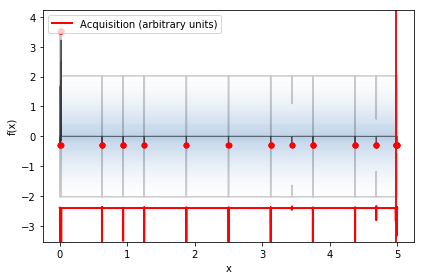

In [11]:
bolfi.bolfi.plot_acquisition()

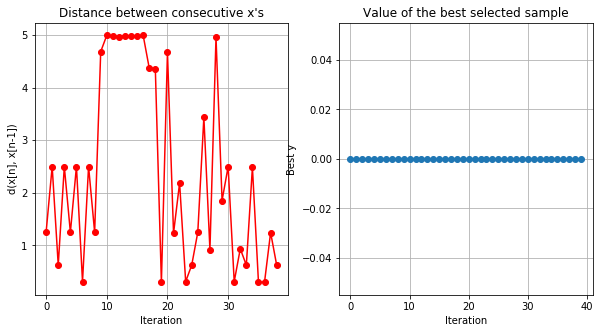

In [12]:
bolfi.bolfi.plot_convergence()

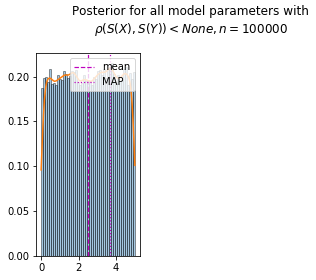

In [13]:
plot_marginals(bolfi, normed=True)